In [ ]:
# Import all potentially useful packages
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import scipy
from scipy import linalg
import itertools
import seaborn as sns

# Get info
# add path to the Google Colab notebook
from google.colab import drive
drive.mount('/content/drive/')
import os
import sys
dataset_path = '/content/drive/My Drive/BME 590 Biotech Design Projects/Spring Semester/'
ecloacae_df = pd.read_csv(dataset_path + 'E_cloacae_growth.csv')
pfluorescens_df = pd.read_csv(dataset_path + 'P_fluorescens_growth.csv')

Mounted at /content/drive/


#Growth Curve

In [ ]:
ecloacae_df['ul original'] = round(ecloacae_df['ul original'],3)
pfluorescens_df['ul original'] = round(pfluorescens_df['ul original'],3)
ecloacae_df.head()

,Time,average,sem,ul original,media,new average,new sem,normalized average
0,0.0,0.092667,0.002404,0.000,TSB,0.000000,0.003399,0.000000
1,0.0,0.066333,0.002333,0.000,LB,0.000000,0.003300,0.000000
2,0.0,1.073667,0.002603,100.000,TSB,0.981000,0.003543,0.754615
3,0.0,0.808667,0.008950,100.000,LB,0.742333,0.009250,0.571026
4,0.0,0.204000,0.001000,9.091,TSB,0.111333,0.002603,0.085641


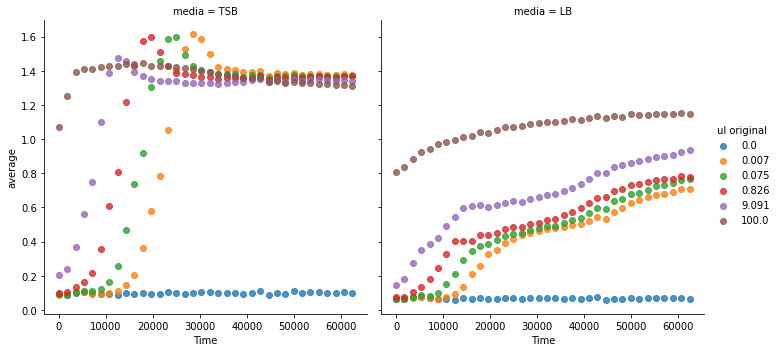

In [ ]:
# Plot using Seaborn
sns.lmplot(x='Time', y='average', data=ecloacae_df,
           fit_reg=False, 
           hue='ul original', col='media',logistic=True)

In [ ]:
#ec_ul = ecloacae_df.groupby(['ul original','media'])
#ec_0ulTSB = ec_ul.get_group((0,'TSB'))
#ec_0ulLB = ec_ul.get_group((0,'LB'))
#print(ec_0ul)
def normalize_data(df):
  for index, row in df.iterrows():
  #find the average for its ul original, media, and time
    blank = df.loc[(df['ul original']==0.0) &( df['Time']==row['Time']) & (df['media']==row['media'])]
    saturation = df.loc[(df['ul original']==100.0) &( df['Time']==max(df['Time'])) & (df['media']==row['media'])]
    df.at[index,'new average'] = row['average'] - list(blank['average'])[0] 
    df.at[index,'new sem'] = (row['sem']**2 + list(blank['sem'])[0]**2)**0.5
  df['normalized average'] = (df['new average'])/list(saturation['average'])[0] 
  return df
#for media_group in ('TSB','LB'):
#  for ul_group in (0.0,round(100/11**4,9),round(100/11**3,8),round(100/11**2,9),round(100/11,9),100.0):
#    ec_temp = ec_ul.get_group((ul_group, media_group))
#    ec_temp['average'] = ec_temp['average'] - ec_ul.get_group((0, media_group))['average']
#    ec_empty.append(ec_temp)


In [ ]:
ecloacae_df = normalize_data(ecloacae_df)
ecloacae_df.head()

,Time,average,sem,ul original,media,new average,new sem,normalized average
0,0.0,0.092667,0.002404,0.000,TSB,0.000000,0.003399,0.000000
1,0.0,0.066333,0.002333,0.000,LB,0.000000,0.003300,0.000000
2,0.0,1.073667,0.002603,100.000,TSB,0.981000,0.003543,0.855523
3,0.0,0.808667,0.008950,100.000,LB,0.742333,0.009250,0.647384
4,0.0,0.204000,0.001000,9.091,TSB,0.111333,0.002603,0.097093


In [ ]:
pfluorescens_df = normalize_data(pfluorescens_df)
pfluorescens_df.head()

,Time,average,sem,ul original,media,new average,new sem,normalized average
0,0.0,0.089333,0.000882,0.000,TSB,0.000000,0.001247,0.000000
1,0.0,0.064333,0.000333,0.000,LB,0.000000,0.000471,0.000000
2,0.0,0.554000,0.026160,100.000,TSB,0.464667,0.026175,0.586207
3,0.0,0.539333,0.032095,100.000,LB,0.475000,0.032097,0.599243
4,0.0,0.128333,0.001856,9.091,TSB,0.039000,0.002055,0.049201


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


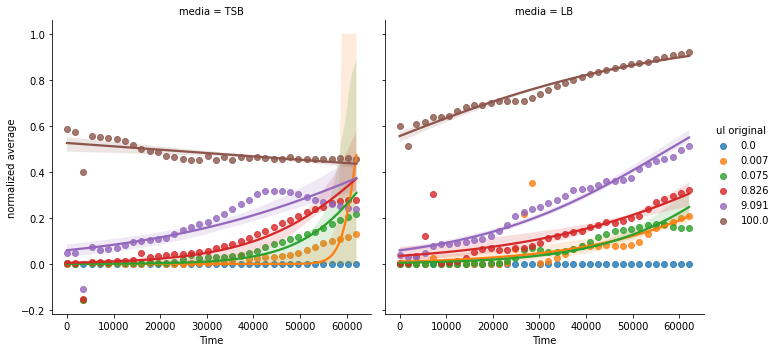

In [ ]:
sns.lmplot(x='Time', y='normalized average', data=pfluorescens_df,
           fit_reg=True, 
           hue='ul original', col='media',logistic=True)

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


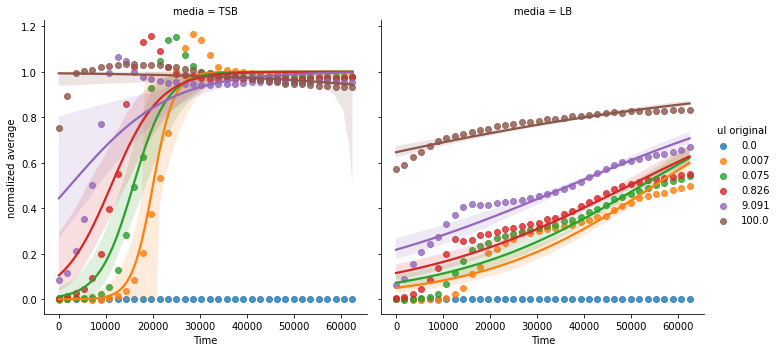

In [ ]:
# Plot using Seaborn
sns.lmplot(x='Time', y='normalized average', data=ecloacae_df,
           fit_reg=True, 
           hue='ul original', col='media',logistic=True)

In [ ]:
pfluorescens_df.loc[len(pfluorescens_df)-8]['average']

0.281667

In [ ]:
blank = pfluorescens_df.loc[(pfluorescens_df['ul original']==0.0) &( pfluorescens_df['Time']<1) &(pfluorescens_df['media']=='TSB')]
list(blank['average'])[0]

0.089333

# A bunch of lines

In [ ]:
pon2bact_df = pd.read_csv(dataset_path + 'Pon2_bacteria_od600.csv')
pon2bact_df.head()
x1_df = pon2bact_df.filter(['Strain','Group',"Media",'OD 600',"X1"])
x2_df = pon2bact_df.filter(['Strain','Group',"Media",'OD 600',"X2"]).rename(columns={'X2':'X1'})
widenedpon2_df = pd.concat([x1_df,x2_df])
widenedpon2_df.head()

,Strain,Group,Media,OD 600,X1
0,E Cl,ctrl,LB,1.2905,1.292
1,E Cl,pon2,LB,0.8755,0.899
2,E Cl GFP,ctrl,LB,1.3250,1.330
3,E Cl GFP,pon2,LB,0.6145,0.612
4,P Fl,ctrl,LB,0.6795,0.643


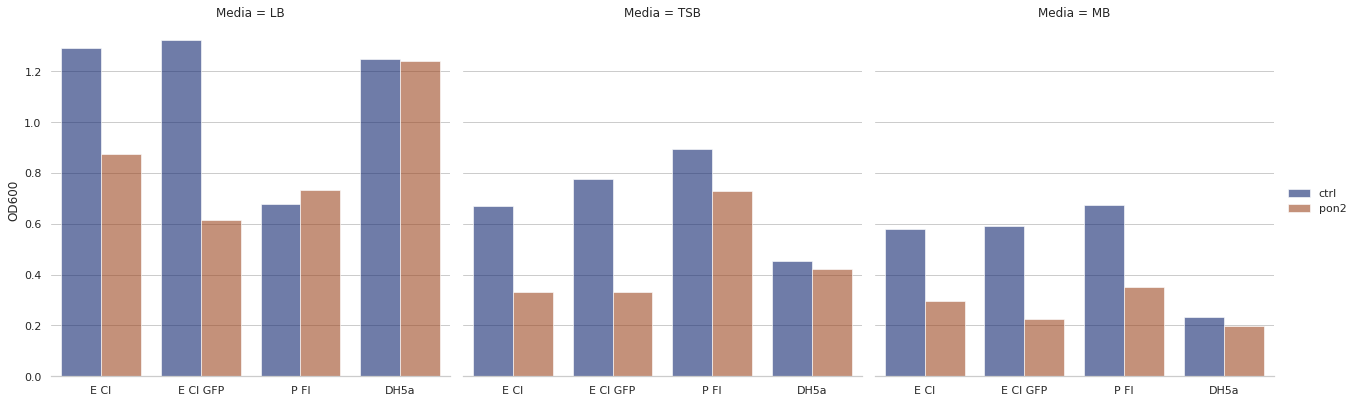

In [ ]:
#fig, ax = plt.subplots()
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=widenedpon2_df, kind="bar",
    col="Media",x="Strain", y="OD 600", hue="Group",
    palette="dark",alpha=.6,  height=6
)
g.despine(left=True)
g.set_axis_labels("", "OD600")
g.legend.set_title("")


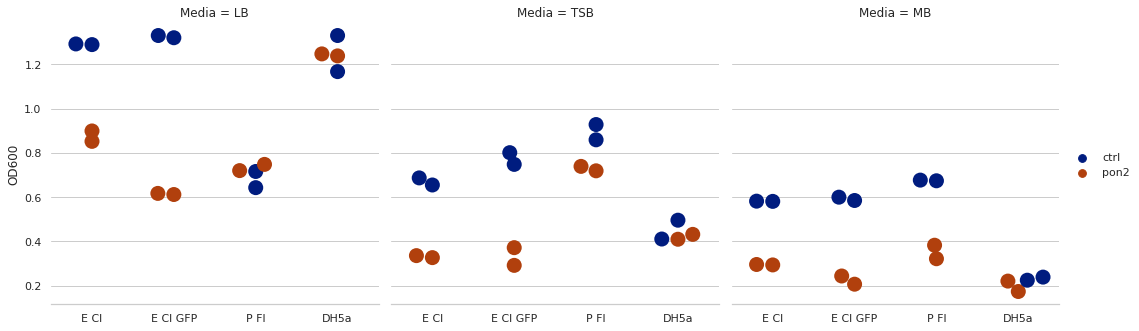

In [ ]:
#fig, ax = plt.subplots()
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=widenedpon2_df, kind="swarm",
    col="Media",x="Strain", y="X1", hue="Group",
    palette="dark", s= 15
)
g.despine(left=True)
g.set_axis_labels("", "OD600")
g.legend.set_title("")
plt.savefig(dataset_path+'dots.png',transparent=True)